In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
dir = '/content/SMG'
class_names = ['A_TXT', 'N_TXT']
class_var = []
channel_val = []

for folder_name in os.listdir(dir):
    folder_path = os.path.join(dir, folder_name)
    if os.path.isdir(folder_path) and folder_name in class_names:
        for file_name in os.listdir(folder_path):
            i = 0
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, "r") as file:
                for _ in range(7):
                    next(file)
                for line in file:
                    i = i+1
                    if not line.strip():
                        continue
                    h = line.strip()
                    values = line.split()[:5]
                    if len(values) < 5:
                        continue
                    values = [float(value) for value in values]
                    channel_val.append(values)
                    name = folder_name
                    index = class_names.index(name)
                    class_var.append(index)
channel_val = np.array(channel_val)
class_var = np.array(class_var)

In [ ]:
x_train = channel_val[:, :4]
y_train = channel_val[:,4]

length = len(channel_val)
df = 2

X = []
Y = []

for i in range(length - df):
    x = np.concatenate([x_train[i+j] for j in range(df)])
    X.append(x)
    Y.append(y_train[i + df])

X = np.array(X)
Y = np.array(Y)

x1_train = X
y1_train = Y

In [ ]:
x1_train.shape

(1325043, 8)

In [ ]:
y1_train.shape

(1325043,)

In [ ]:
# Split the data into training and testing sets
x1_train, x1_val, y1_train, y1_val = train_test_split(x1_train, y1_train, test_size=0.15, random_state=42)

# scaling train data
scaler = StandardScaler()
x1_train = scaler.fit_transform(x1_train)
x1_val = scaler.transform(x1_val)

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from scipy.stats import randint
import keras
from keras.models import Sequential
from keras.layers import Dense

In [20]:
def Model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(x1_train.shape[1],)))
    model.add(keras.layers.Dense(units=hp.Int('units1', min_value=64, max_value=256, step=32),
                                  activation=hp.Choice('activation1', values=['relu', 'sigmoid', 'elu'])))
    model.add(keras.layers.Dense(units=hp.Int('units2', min_value=64, max_value=256, step=32),
                                  activation=hp.Choice('activation1', values=['relu', 'sigmoid','elu'])))
    model.add(keras.layers.Dense(units=hp.Int('units3', min_value=32, max_value=128, step=32),
                                activation='relu'))
    model.add(keras.layers.Dense(units=1, activation='linear'))
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mae'])
    return model

we use random search for hyper parameters because it is faster

Reloading Tuner from /content/SMG/untitled_project/tuner0.json
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7a3926069750>
Best hyperparameters:
{'units1': 256, 'activation1': 'relu', 'units2': 160, 'units3': 96}
Epoch 1/100
141/141 [==============================] - 2s 5ms/step - loss: 2042.8840 - mae: 33.6455
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 1907.5729 - mae: 32.1620
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 1868.2373 - mae: 31.6398
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 1849.1377 - mae: 31.3551
Epoch 5/100
141/141 [==============================] - 1s 4ms/step - loss: 1839.0062 - mae: 31.1745
Epoch 6/100
141/141 [==============================] - 1s 4ms/step - loss: 1832.3605 - mae: 31.0543
Epoch 7/100
141/141 [==============================] - 1s 4ms/step - loss: 1825.7552 - mae: 30.9585
Epoch 8/100
141/141 [======

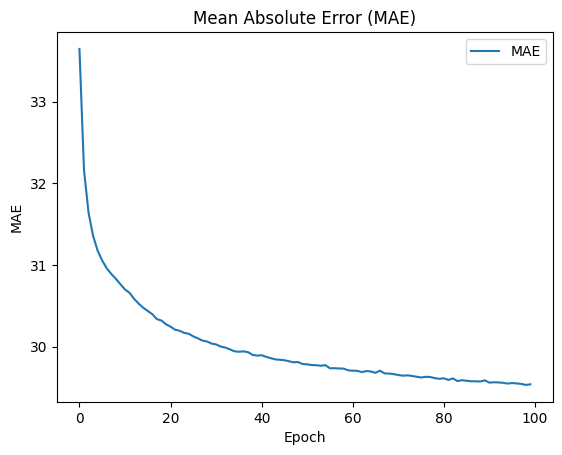

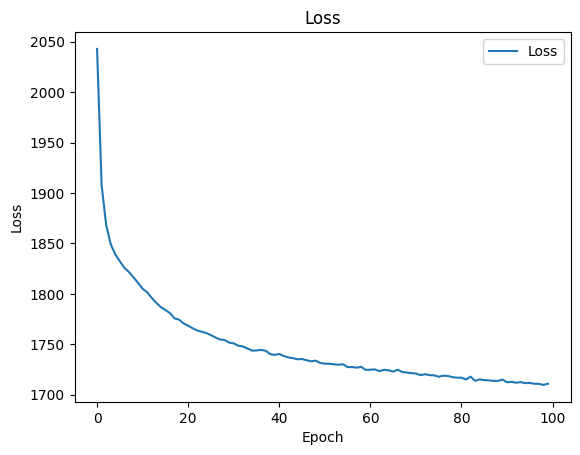

In [30]:
# Define the search space
tuner = RandomSearch(
    Model,
    objective='val_mae',
    max_trials=20,  # Number of search trials
    directory='/content/SMG',  # Directory to save the search results
)

# Perform the hyperparameter search
tuner.search(x1_train, y1_train, epochs=25, batch_size =8000, validation_split=0.15)

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=20)[0]
print(f"Best hyperparameters: {best_hp}")
print("Best hyperparameters:")
print(best_hp.values)

# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hp)
history = model.fit(x1_train, y1_train, epochs=100, batch_size =8000)
model.save("model_q6_b1.h5")

# Plot MAE
plt.plot(history.history['mae'], label='MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
x_train = channel_val[:, :4]
y_train = channel_val[:,4]

length = len(channel_val)
df = 10

X = []
Y = []

for i in range(length - df):
    x = np.concatenate([x_train[i+j] for j in range(df)])
    X.append(x)
    Y.append(y_train[i + df])

X = np.array(X)
Y = np.array(Y)

x2_train = X
y2_train = Y

In [23]:
x2_train.shape

(1325035, 40)

In [24]:
y2_train.shape

(1325035,)

In [25]:
# Split the data into training and testing sets
x2_train, x2_val, y2_train, y2_val = train_test_split(x2_train, y2_train, test_size=0.15, random_state=42)

# scaling train data
scaler = StandardScaler()
x2_train = scaler.fit_transform(x2_train)
x2_val = scaler.transform(x2_val)

In [26]:
def Model2(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(x2_train.shape[1],)))
    model.add(keras.layers.Dense(units=hp.Int('units1', min_value=64, max_value=256, step=32),
                                  activation=hp.Choice('activation1', values=['relu', 'sigmoid', 'elu'])))
    model.add(keras.layers.Dense(units=hp.Int('units2', min_value=64, max_value=256, step=32),
                                  activation=hp.Choice('activation1', values=['relu', 'sigmoid','elu'])))
    model.add(keras.layers.Dense(units=hp.Int('units3', min_value=32, max_value=128, step=32),
                                activation='relu'))
    model.add(keras.layers.Dense(units=1, activation='linear'))
    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mae'])
    return model

Reloading Tuner from /content/SMG/untitled_project/tuner0.json
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7a392fac26b0>
Best hyperparameters:
{'units1': 256, 'activation1': 'relu', 'units2': 160, 'units3': 96}
Epoch 1/100
141/141 [==============================] - 3s 9ms/step - loss: 2012.2932 - mae: 33.2799
Epoch 2/100
141/141 [==============================] - 1s 10ms/step - loss: 1821.1273 - mae: 31.1158
Epoch 3/100
141/141 [==============================] - 1s 5ms/step - loss: 1754.6895 - mae: 30.3172
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 1698.0774 - mae: 29.7168
Epoch 5/100
141/141 [==============================] - 1s 4ms/step - loss: 1650.9666 - mae: 29.2431
Epoch 6/100
141/141 [==============================] - 1s 4ms/step - loss: 1616.5553 - mae: 28.8757
Epoch 7/100
141/141 [==============================] - 1s 4ms/step - loss: 1591.9381 - mae: 28.6165
Epoch 8/100
141/141 [=====

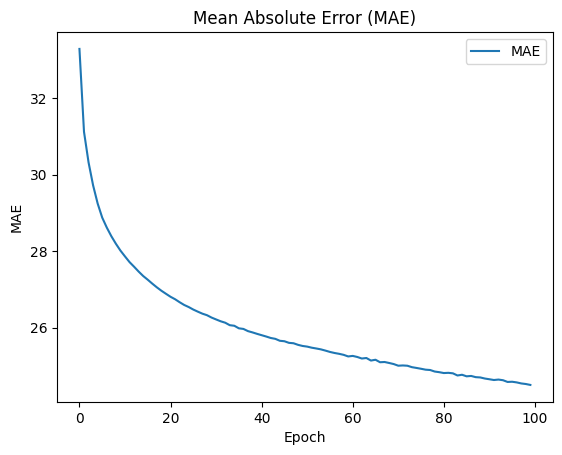

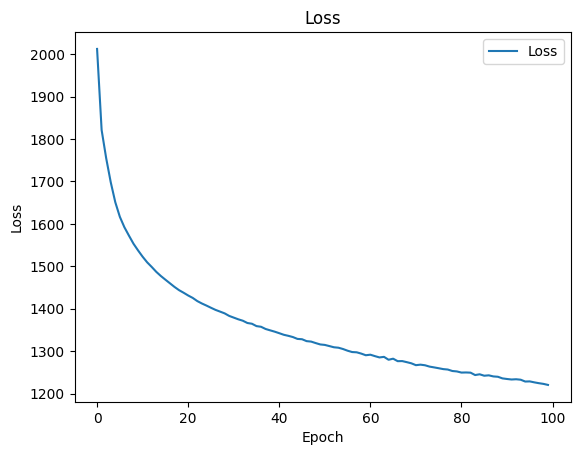

In [29]:
# Define the search space
tuner = RandomSearch(
    Model2,
    objective='val_mae',
    max_trials=20,  # Number of search trials
    directory='/content/SMG',  # Directory to save the search results
)

# Perform the hyperparameter search
tuner.search(x2_train, y2_train, epochs=25, batch_size =8000, validation_split=0.15)

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=20)[0]
print(f"Best hyperparameters: {best_hp}")
print("Best hyperparameters:")
print(best_hp.values)

# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hp)
history = model.fit(x2_train, y2_train, epochs=100, batch_size =8000)
model.save("model_q6_b2.h5")

# Plot MAE
plt.plot(history.history['mae'], label='MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

we see that change df from 2 to 10 can give us better network and loss,MAE is lower 